In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh')

# Pulling the Data

Data range is January 2019 - December 2024.

In [3]:
URL = 'https://storage.data.gov.my/transportation/ridership_headline.parquet'
df = pd.read_parquet(URL)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2192 non-null   datetime64[ns]
 1   bus_rkl             1096 non-null   Int64         
 2   bus_rkn             1096 non-null   Int64         
 3   bus_rpn             1096 non-null   Int64         
 4   rail_lrt_ampang     2192 non-null   Int64         
 5   rail_mrt_kajang     2192 non-null   Int64         
 6   rail_lrt_kj         2192 non-null   Int64         
 7   rail_monorail       2192 non-null   Int64         
 8   rail_mrt_pjy        930 non-null    Int64         
 9   rail_ets            1539 non-null   Int64         
 10  rail_intercity      1539 non-null   Int64         
 11  rail_komuter_utara  1539 non-null   Int64         
 12  rail_tebrau         927 non-null    Int64         
 13  rail_komuter        458 non-null    Int64       

In [4]:
df.describe()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
count,2192,1096.0,1096.0,1096.0,2192.0,2192.0,2192.0,2192.0,930.0,1539.0,1539.0,1539.0,927.0,458.0
mean,2021-12-31 12:00:00,170072.344891,2379.140511,38349.458029,127995.705292,142821.560675,172719.627737,33172.278741,87988.750538,8042.901235,2791.338532,8659.849903,8359.349515,35470.844978
min,2019-01-01 00:00:00,71611.0,916.0,20758.0,6587.0,4973.0,7195.0,1392.0,12108.0,50.0,28.0,436.0,4348.0,20236.0
25%,2020-07-01 18:00:00,136824.75,2043.5,34601.5,87346.25,82245.25,104255.25,17603.5,24700.75,3841.5,1302.5,4688.5,7878.5,30235.25
50%,2021-12-31 12:00:00,164275.5,2385.0,39256.5,129210.5,141602.5,157179.0,33673.5,94454.5,9882.0,2482.0,9253.0,8472.0,36775.0
75%,2023-07-02 06:00:00,213359.25,2718.25,43108.25,168924.75,204515.5,253222.25,48552.5,134672.5,11772.5,4268.5,12332.5,9072.0,38607.25
max,2024-12-31 00:00:00,264236.0,4865.0,56449.0,258313.0,367376.0,352328.0,91717.0,220980.0,14584.0,7648.0,21817.0,10036.0,89320.0
std,NaN,46169.856328,503.095683,6430.953185,56924.121444,73425.470861,92102.923074,17258.735188,52153.91953,4525.916857,1844.627371,4594.335058,1000.697749,6630.316599


# Focusing on Rapid Rail (LRT & MRT)

In [5]:
rapid_rail = df[['date', 'rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy']]
rapid_rail.describe()

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy
count,2192,2192.0,2192.0,2192.0,2192.0,930.0
mean,2021-12-31 12:00:00,127995.705292,142821.560675,172719.627737,33172.278741,87988.750538
min,2019-01-01 00:00:00,6587.0,4973.0,7195.0,1392.0,12108.0
25%,2020-07-01 18:00:00,87346.25,82245.25,104255.25,17603.5,24700.75
50%,2021-12-31 12:00:00,129210.5,141602.5,157179.0,33673.5,94454.5
75%,2023-07-02 06:00:00,168924.75,204515.5,253222.25,48552.5,134672.5
max,2024-12-31 00:00:00,258313.0,367376.0,352328.0,91717.0,220980.0
std,NaN,56924.121444,73425.470861,92102.923074,17258.735188,52153.91953


In [6]:
numeric_cols = rapid_rail.select_dtypes(include=['float64', 'int64']).columns.to_list()
rapid_rail_by_year = rapid_rail.groupby(rapid_rail['date'].dt.year)[numeric_cols].sum()
rapid_rail_by_year['total'] = rapid_rail_by_year[numeric_cols].sum(axis=1)
rapid_rail_by_year.reset_index(inplace=True)

In [8]:
rapid_rail_by_year.head(10).style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,"2,019","65,147,222","63,952,805","94,657,974","12,535,738",0,"236,293,739"
1,"2,020","34,715,565","33,168,335","45,307,182","7,143,534",0,"120,334,616"
2,"2,021","21,938,973","19,573,010","25,123,614","4,226,329",0,"70,861,926"
3,"2,022","44,151,332","45,348,209","55,015,765","10,668,069","4,147,577","159,330,952"
4,"2,023","50,590,579","66,501,508","73,763,592","18,107,573","29,555,851","238,519,103"
5,"2,024","64,022,915","84,520,994","84,733,297","20,032,392","48,126,110","301,435,708"


## Ridership Change from 2019 to 2024

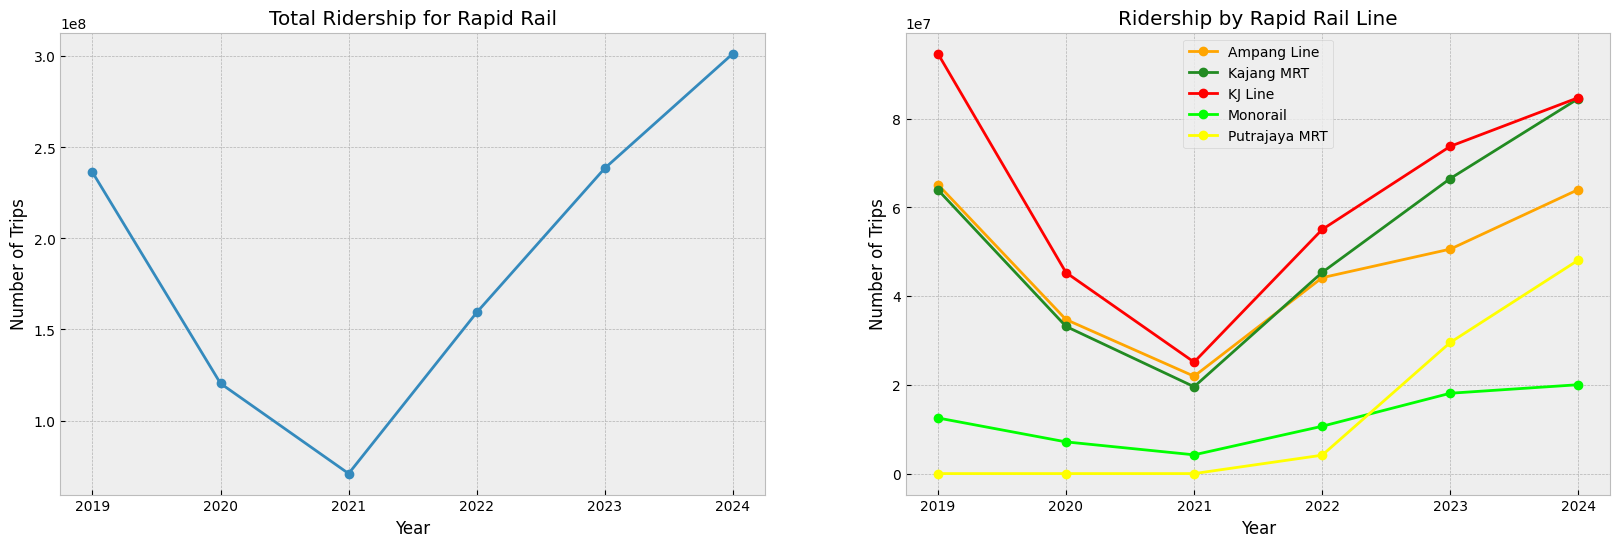

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(rapid_rail_by_year['date'], rapid_rail_by_year['total'], marker='o')
ax[0].set_title('Total Ridership for Rapid Rail')
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('Year')

ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_monorail'], marker='o', label='Monorail', color='lime')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax[1].set_title('Ridership by Rapid Rail Line')
ax[1].set_ylabel('Number of Trips')
ax[1].set_xlabel('Year')
ax[1].legend()

Between 2019 - 2024:
1. Overall ridership increased. There was a dip corresponding to the COVID-19 pandemic but it has exceeded pre-pandemic level for the past two years.
2. Ridership of the KJ Line has fallen below pre-pandemic levels and does not appear to be able to reach it as its ridership appears to be flattening out.
3. Ridership of Ampang Line is almost at pre-pandemic levels.
4. Monorail ridership has increased but is flattening out.
5. Both MRT lines show increasing ridership with the Kajang MRT line's ridership growth impressive.

In [12]:
ridership_change = {}
ridership_change['total'] = (rapid_rail_by_year.query('date == 2024')['total'].values[0] -
                             rapid_rail_by_year.query('date == 2019')['total'].values[0])
for col in numeric_cols:
    ridership_change[col] = (rapid_rail_by_year.query('date == 2024')[col].values[0] -
                             rapid_rail_by_year.query('date == 2019')[col].values[0])

Text(0.5, 1.0, 'Ridership Change from 2019 to 2024')

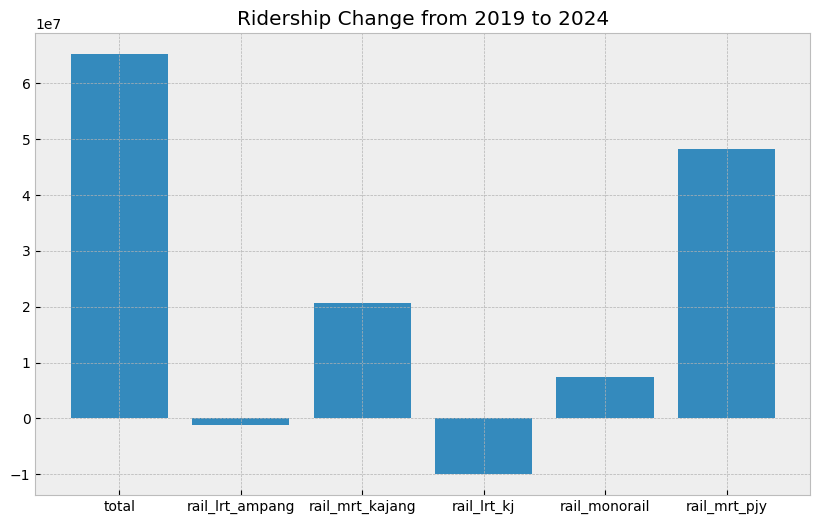

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=list(ridership_change.keys()), height=ridership_change.values())
ax.set_title('Ridership Change from 2019 to 2024')

## 2024 Ridership per KM

As a measure of potential and productivity (?)

In [23]:
line_distance = {
    'rail_lrt_ampang': 45.1,
    'rail_mrt_kajang': 46.0,
    'rail_lrt_kj': 46.4,
    'rail_monorail': 8.6,
    'rail_mrt_pjy': 57.7
}

ridership_per_km = {}
for col in numeric_cols:
    ridership_per_km[col] = rapid_rail_by_year.query('date == 2024')[col].values[0] / line_distance[col]

ridership_per_km

{'rail_lrt_ampang': 1419576.8292682925,
 'rail_mrt_kajang': 1837412.9130434783,
 'rail_lrt_kj': 1826148.6422413795,
 'rail_monorail': 2329347.906976744,
 'rail_mrt_pjy': 834074.6967071057}

Text(0, 0.5, 'Number of Trips per km')

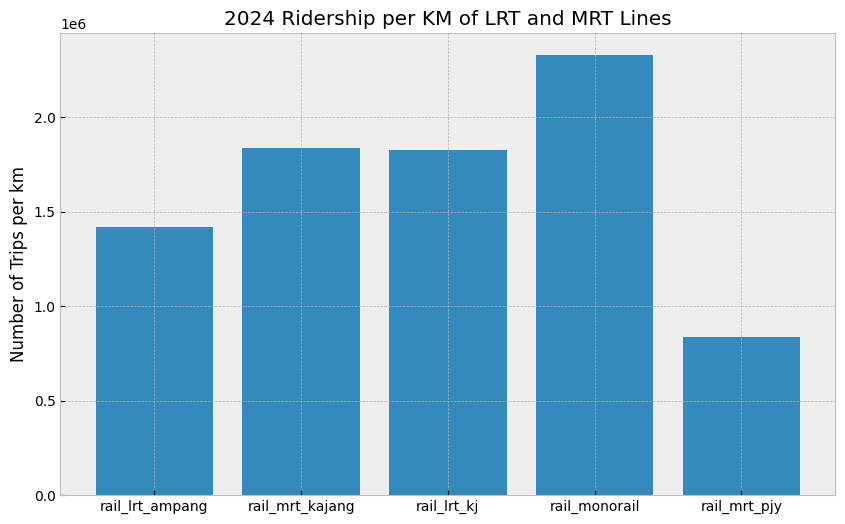

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=list(ridership_per_km.keys()), height=ridership_per_km.values())
ax.set_title('2024 Ridership per KM of LRT and MRT Lines')
ax.set_ylabel('Number of Trips per km')

My takeaways:
1. I'm surprised at the performance of Monorail considering my own experience.
2. The Putrajaya MRT is underutilized.
3. I looked into it briefly and I don't think these changes are related to fare differences.

## 2024 Average Daily Ridership

In [26]:
rapid_rail_2024 = rapid_rail[rapid_rail['date'].dt.year == 2024]
rapid_rail_2024.describe().style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy
count,366,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2024-07-01 12:00:00.000000256,"174,925.997268","230,931.677596","231,511.740437","54,733.311475","131,492.103825"
min,2024-01-01 00:00:00,"90,321.000000","130,563.000000","110,222.000000","28,097.000000","64,358.000000"
25%,2024-04-01 06:00:00,"143,206.250000","197,200.250000","164,943.250000","52,222.250000","98,720.750000"
50%,2024-07-01 12:00:00,"188,265.500000","244,461.500000","263,214.000000","55,886.500000","144,009.500000"
75%,2024-09-30 18:00:00,"203,809.000000","263,397.000000","278,880.250000","58,396.750000","157,803.250000"
max,2024-12-31 00:00:00,"244,890.000000","367,376.000000","345,814.000000","91,717.000000","220,980.000000"
std,nan,"34,890.979871","40,864.582943","59,916.815183","6,578.563048","32,062.900562"


## Looking into Monthly Distribution

In [27]:
rapid_rail_by_month = rapid_rail_2024.groupby(rapid_rail['date'].dt.month)[numeric_cols].sum()
rapid_rail_by_month.reset_index(inplace=True)

In [28]:
rapid_rail_by_month.head().style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy
0,1,"4,505,943","6,506,378","6,591,331","1,680,097","3,651,371"
1,2,"4,430,513","6,167,840","6,236,607","1,602,411","3,364,322"
2,3,"5,196,908","6,650,215","6,937,237","1,607,756","3,746,093"
3,4,"4,894,934","6,262,373","6,445,256","1,557,086","3,575,514"
4,5,"5,607,473","7,112,851","7,206,997","1,605,161","4,045,346"


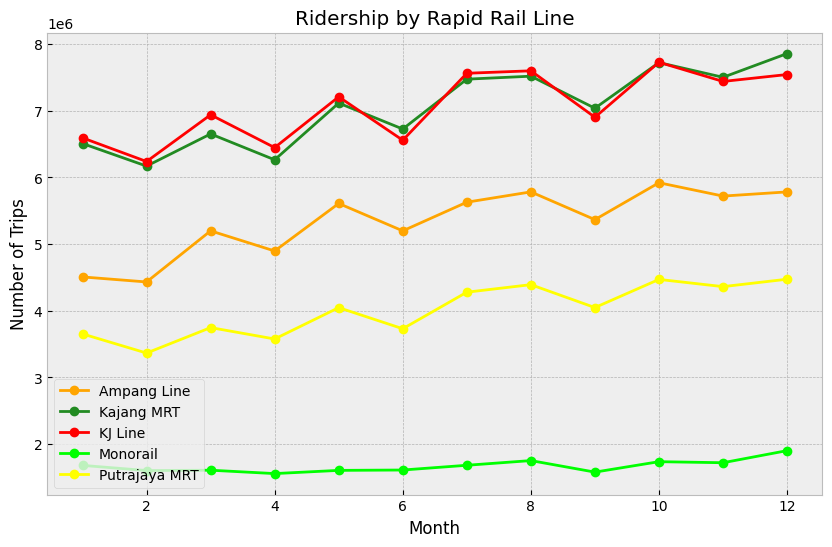

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_monorail'], marker='o', label='Monorail', color='lime')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax.set_title('Ridership by Rapid Rail Line')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Month')
ax.legend()